In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats import norm

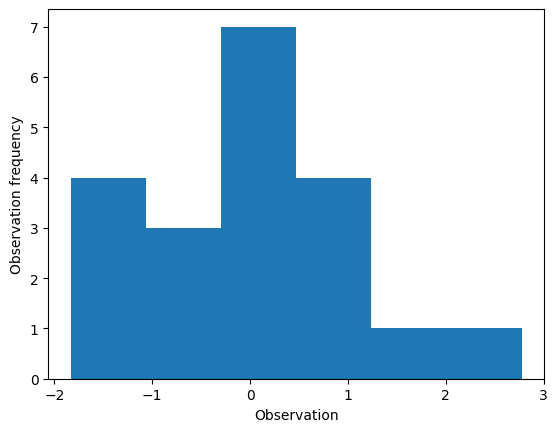

In [2]:
# generate 20 random observations from Normal distribution with mean = 0
np.random.seed(225)

observation = np.random.randn(20)
plt.hist(observation, bins="auto")
plt.xlabel("Observation")
plt.ylabel("Observation frequency")
plt.show()

We can calculate the posterior probability by analatically

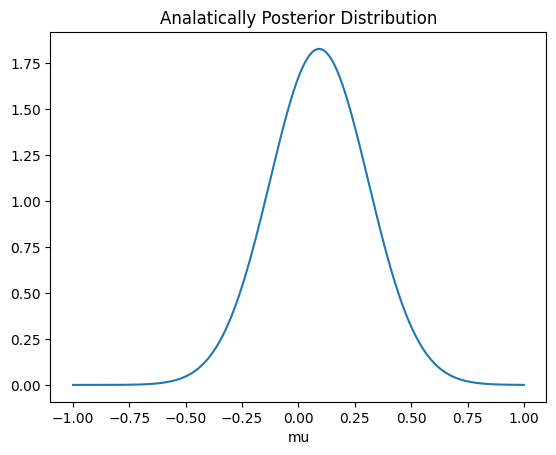

In [3]:
def calculate_posterior_analatically(observation, x, mu_prior, sigma_prior):
    sigma = 1.
    n = len(observation)
    mu_posterior = (mu_prior / sigma_prior**2 + observation.sum() / sigma**2) / (1. / sigma_prior**2 + n / sigma**2)
    sigma_posterior = (1. / sigma_prior**2 + n / sigma**2)**-1
    return norm(mu_posterior, np.sqrt(sigma_posterior)).pdf(x)

x = np.linspace(-1, 1, 500)
posterior_analatic = calculate_posterior_analatically(observation, x, 0., 1.)
plt.plot(x, posterior_analatic)
plt.xlabel("mu")
plt.title("Analatically Posterior Distribution")
plt.show()

Productivity =  0.72637


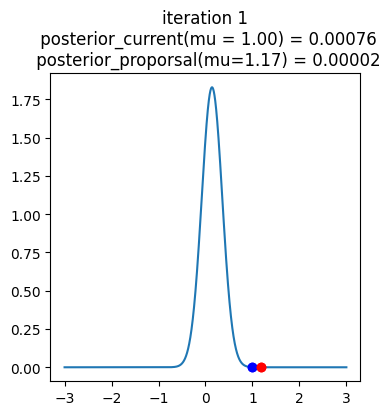

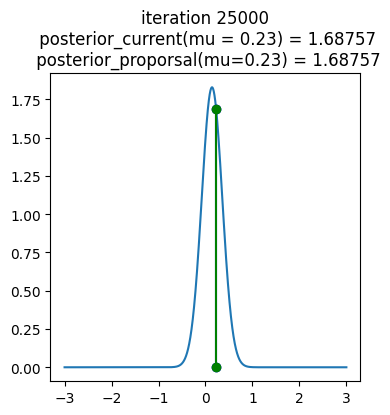

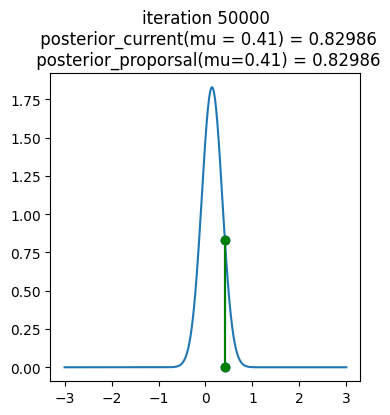

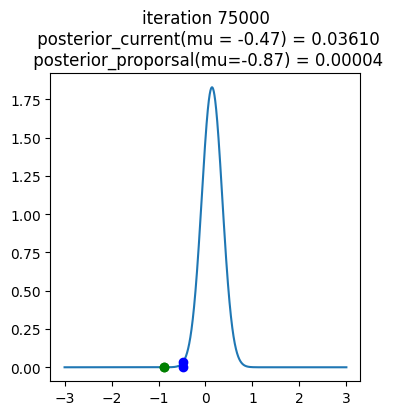

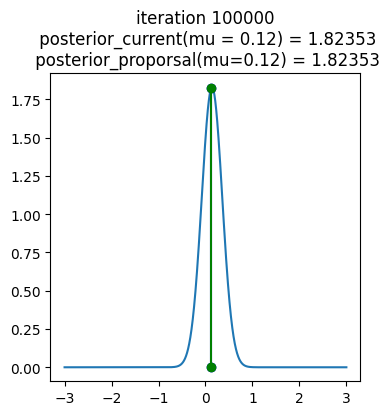

In [7]:
# initialize parameters
N = 100000
mu_current = 1.0
mu_prior_mu = 1.0
mu_prior_std = 1.0
proporsal_width = 0.2

posterior = [mu_current]
n_accepted = 0

for i in range(N):
    
    # propose new value
    #returns a random sample of the distribution with probability equal to the distribution
    mu_proporsal = norm(mu_current, proporsal_width).rvs()
    
    # calculate likelihood (by multiplying every observation point's probability)
    likelihood_current = norm(mu_current, 1).pdf(observation).prod()
    likelihood_proporsal = norm(mu_proporsal, 1).pdf(observation).prod()
    
    # calculate prior probabilitys for current and proporsal mu
    prior_current = norm(mu_prior_mu, mu_prior_std).pdf(mu_current)
    prior_proporsal = norm(mu_prior_mu, mu_prior_std).pdf(mu_proporsal)
    
    p_current = likelihood_current * prior_current
    p_proporsal = likelihood_proporsal * prior_proporsal
    
    u = np.random.uniform()
    
    # calculate the probability of accepting the proposal
    r = p_proporsal / p_current
    
    #accepting?
    if u < r:
        #update value
        mu_current = mu_proporsal
        n_accepted += 1
    
    posterior.append(mu_current)
    
    # draw the posterior distribution and proporsals
    if i == 0 or (i + 1)%(N / 4) == 0:
        
        fig, (ax_1) = plt.subplots(ncols=1, figsize=(4,4))
        x = np.linspace(-3, 3, 5000)
        color = "g" if n_accepted else "r"
        
        # calculate posterior probability
        posterior_analatic = calculate_posterior_analatically(observation, x, mu_prior_mu, mu_prior_std)
        ax_1.plot(x, posterior_analatic)
        posterior_current = calculate_posterior_analatically(observation, mu_current, mu_prior_mu, mu_prior_std)
        posterior_proporsal = calculate_posterior_analatically(observation, mu_proporsal, mu_prior_mu, mu_prior_std)
        ax_1.plot([mu_current] * 2, [0, posterior_current], marker = 'o', color = "b")
        ax_1.plot([mu_proporsal] * 2, [0, posterior_proporsal], marker = 'o', color = color)
        ax_1.set(title = "iteration %i\n posterior_current(mu = %.2f) = %.5f\n posterior_proporsal(mu=%.2f) = %.5f" % (i+1, mu_current, posterior_current, mu_proporsal, posterior_proporsal))
        
print("Productivity = ", n_accepted/N)